### **Deep Learning for Financial Market: Evaluating LSTM, CNN, and RNN Models in Stock Price Analysis and Prediction**

In [ ]:
#!pip uninstall yfinance pandas_datareader
#!pip install yfinance pandas_datareader

In [ ]:
!pip install yfinance pandas_datareader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
import pandas_datareader as pdr
import plotly.express as px

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
stock_tickers = ['NVDA','MU', 'MSFT', 'GOOGL', 'META', 'AAPL']

In [ ]:
#end_date = datetime.now()
end_date  = datetime(2024, 8, 1)
start_date= datetime(2012, 8, 1)
#start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

# Preprocessing

In [ ]:
stock_data = {}
for ticker in stock_tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

    all_dates = pd.date_range(start=start_date, end=end_date, freq='B')  #Only business days
    stock_data[ticker] = stock_data[ticker].reindex(all_dates)

    #Forward fill for non-trading days
    stock_data[ticker].fillna(method='ffill', inplace=True)

    #Backward fill if forward fill leaves NaNs at the beginning
    stock_data[ticker].fillna(method='bfill', inplace=True)

    #Assign the stock data to a global variable
    globals()[ticker] = stock_data[ticker]

[*********************100%%**********************]  1 of 1 completed
<ipython-input-174-62f6e2afd530>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data[ticker].fillna(method='ffill', inplace=True)
<ipython-input-174-62f6e2afd530>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data[ticker].fillna(method='bfill', inplace=True)
[*********************100%%**********************]  1 of 1 completed
<ipython-input-174-62f6e2afd530>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data[ticker].fillna(method='ffill', inplace=True)
<ipython-input-174-62f6e2afd530>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead

In [ ]:
#Combine data into a single DataFrame
company_list = [globals()[ticker] for ticker in stock_tickers]
company_name = ["NVIDIA", "Micron Technology", "MICROSOFT", "GOOGLE", "META","APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
print(df.tail(10))

                  Open        High         Low       Close   Adj Close  \
2024-07-19  224.820007  226.800003  223.279999  224.309998  224.050659   
2024-07-22  227.009995  227.779999  223.089996  223.960007  223.701080   
2024-07-23  224.369995  226.940002  222.679993  225.009995  224.749847   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   
2024-07-31  221.440002  223.820007  220.630005  222.080002  221.823242   
2024-08-01  221.440002  223.820007  220.630005  222.080002  221.823242   

                Volume company_name  
2024-07-19  49151500.0        APPLE  
2024-07-22  48201800.0        APPLE  
2024-07-23  39960300.0        APPLE  
2024-07-24  61777600.0        APP

In [ ]:
df['company_name'].unique()

array(['NVIDIA', 'Micron Technology', 'MICROSOFT', 'GOOGLE', 'META',
       'APPLE'], dtype=object)

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [ ]:
#Statistic Summary
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3.132000e+03
mean,12.958604,13.194701,12.706083,12.964383,12.937191,4.477573e+08
std,21.911916,22.320433,21.450604,21.913647,21.918833,2.462380e+08
min,0.287250,0.290750,0.278750,0.284500,0.260951,4.564400e+07
25%,0.563063,0.569875,0.556000,0.564875,0.544840,2.906160e+08
50%,4.584875,4.662500,4.515750,4.607500,4.583511,3.955790e+08
75%,15.120312,15.355000,14.863875,15.153750,15.136318,5.367932e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,3.692928e+09


In [ ]:
nvda_df = df[df['company_name'] == "NVIDIA"]

In [ ]:
mu_df = df[df['company_name'] == "Micron Technology"]

In [ ]:
len(nvda_df)

3132

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18792 entries, 2012-08-01 to 2024-08-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          18792 non-null  float64
 1   High          18792 non-null  float64
 2   Low           18792 non-null  float64
 3   Close         18792 non-null  float64
 4   Adj Close     18792 non-null  float64
 5   Volume        18792 non-null  float64
 6   company_name  18792 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


# Analysing

In [ ]:
#Calculate date range to display as title
start_date = company.index.min().strftime('%Y-%m-%d')
end_date = company.index.max().strftime('%Y-%m-%d')
date_range = f"Data from {start_date} to {end_date}"

### Closing Price trend

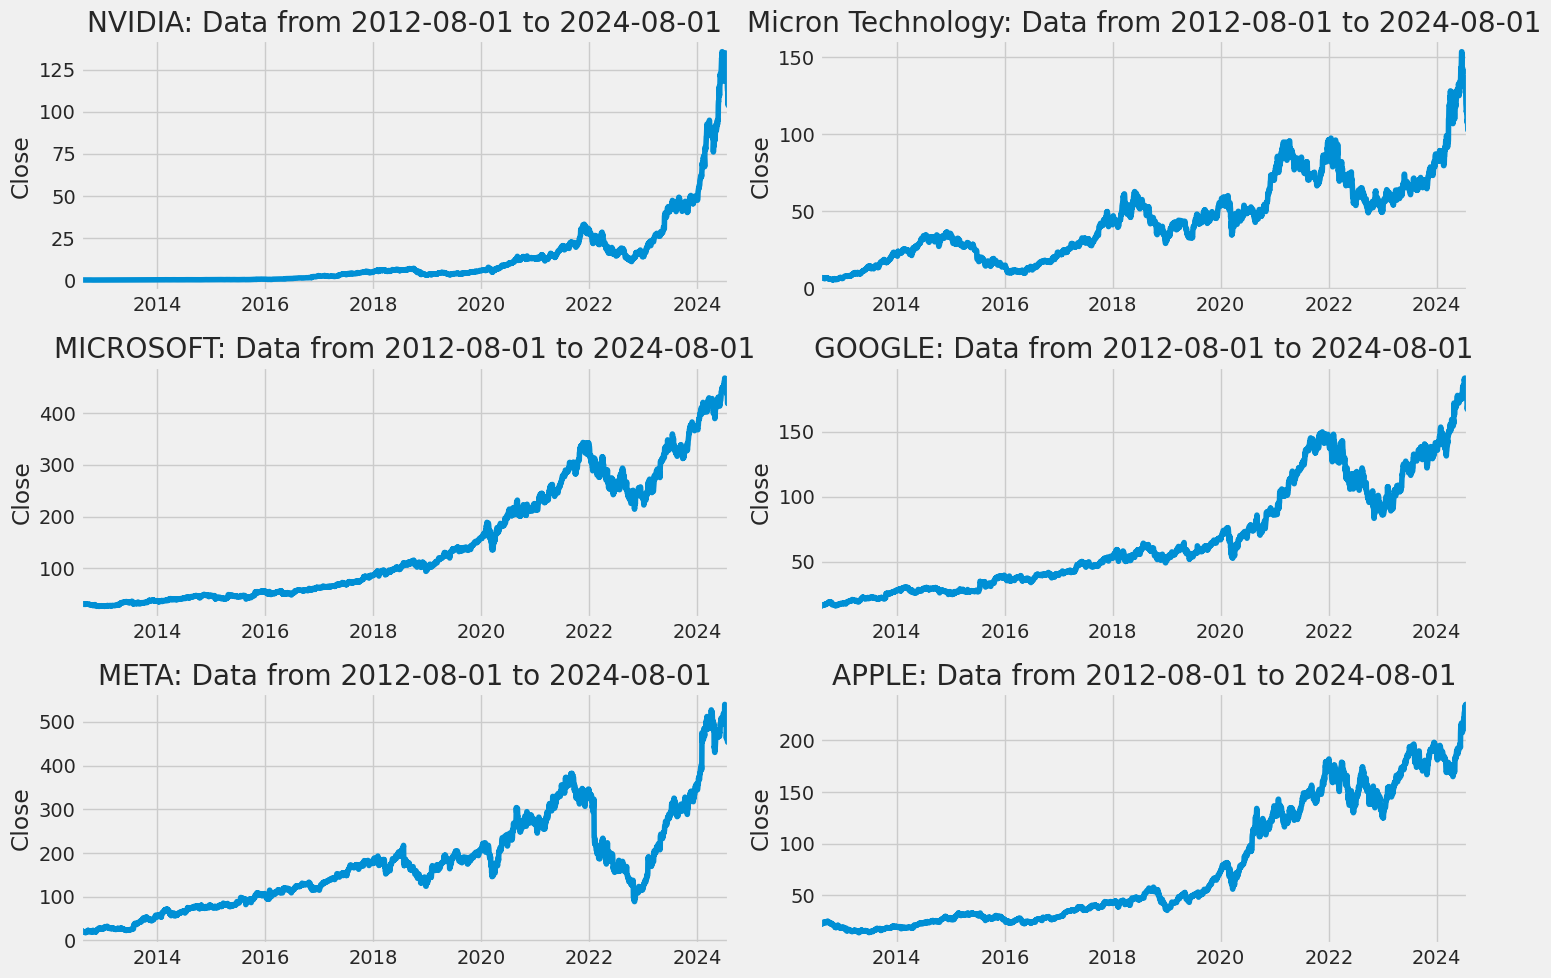

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel('')

    plt.title(f"{company_name[i - 1]}: {date_range}")

plt.tight_layout()
plt.show()

### Moving Average of each stock


*   The numbers of day which will be set for calculating moving average are 15 and 30 to identify trends and patterns in each company’s stock price movements



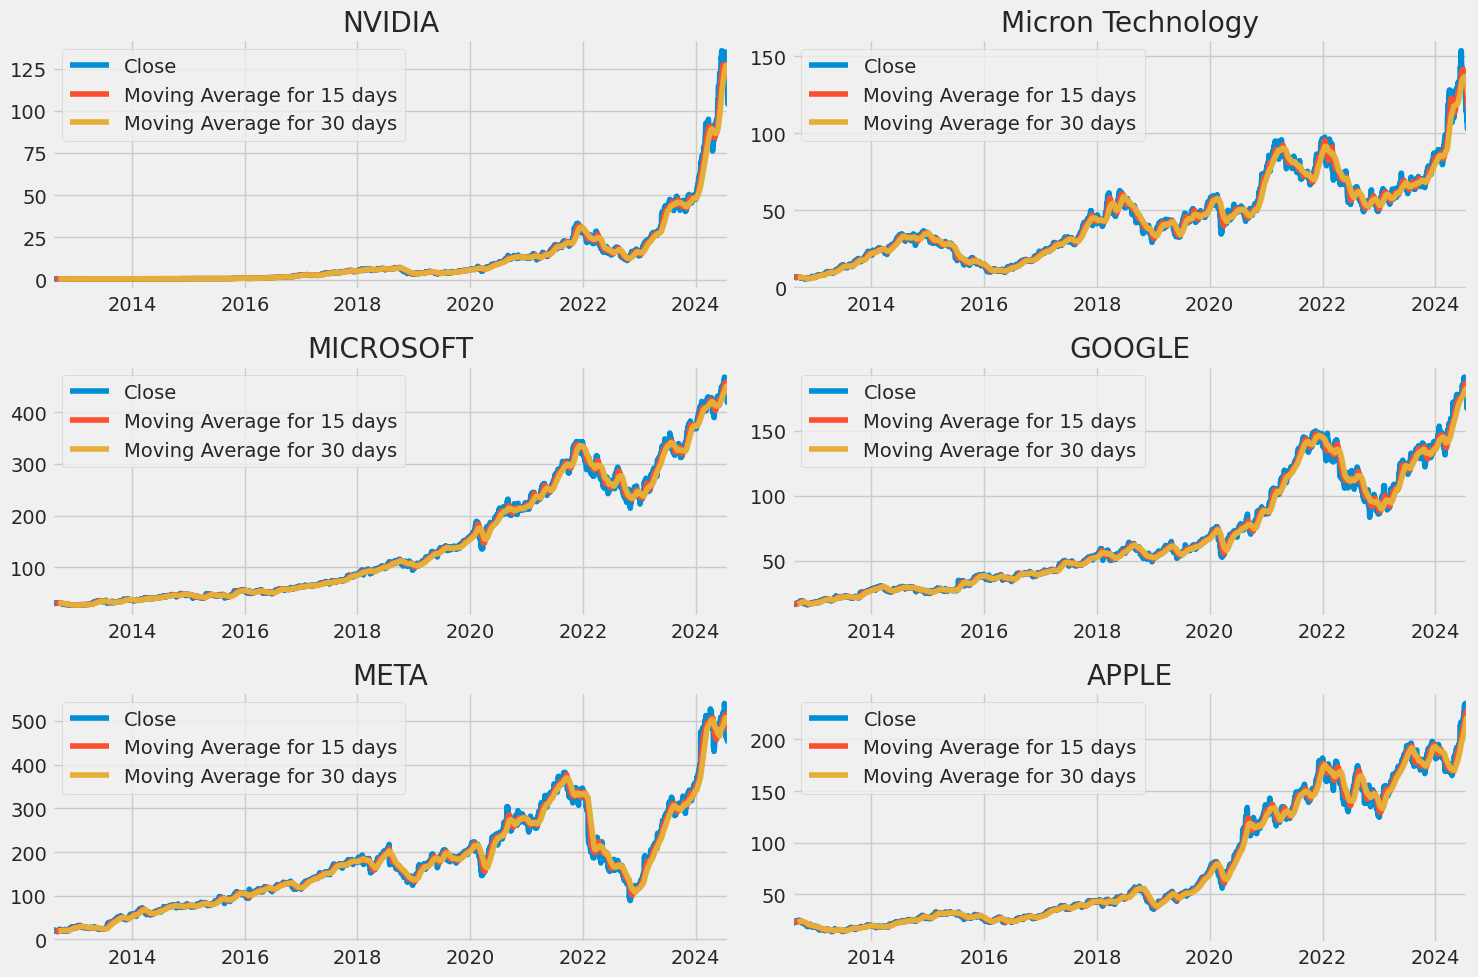

In [ ]:
mov_avg_days = [15, 30]

for mov_avg_day in mov_avg_days:
    for company in company_list:
        column_name = f"Moving Average for {mov_avg_day} days"
        company[column_name] = company['Close'].rolling(mov_avg_day).mean()


fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

NVDA[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NVIDIA')

MU[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Micron Technology')

MSFT[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

GOOGL[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GOOGLE')

META[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[2,0])
axes[2,0].set_title('META')

AAPL[['Close', 'Moving Average for 15 days', 'Moving Average for 30 days']].plot(ax=axes[2,1])
axes[2,1].set_title('APPLE')

fig.tight_layout()

### Sales Volume

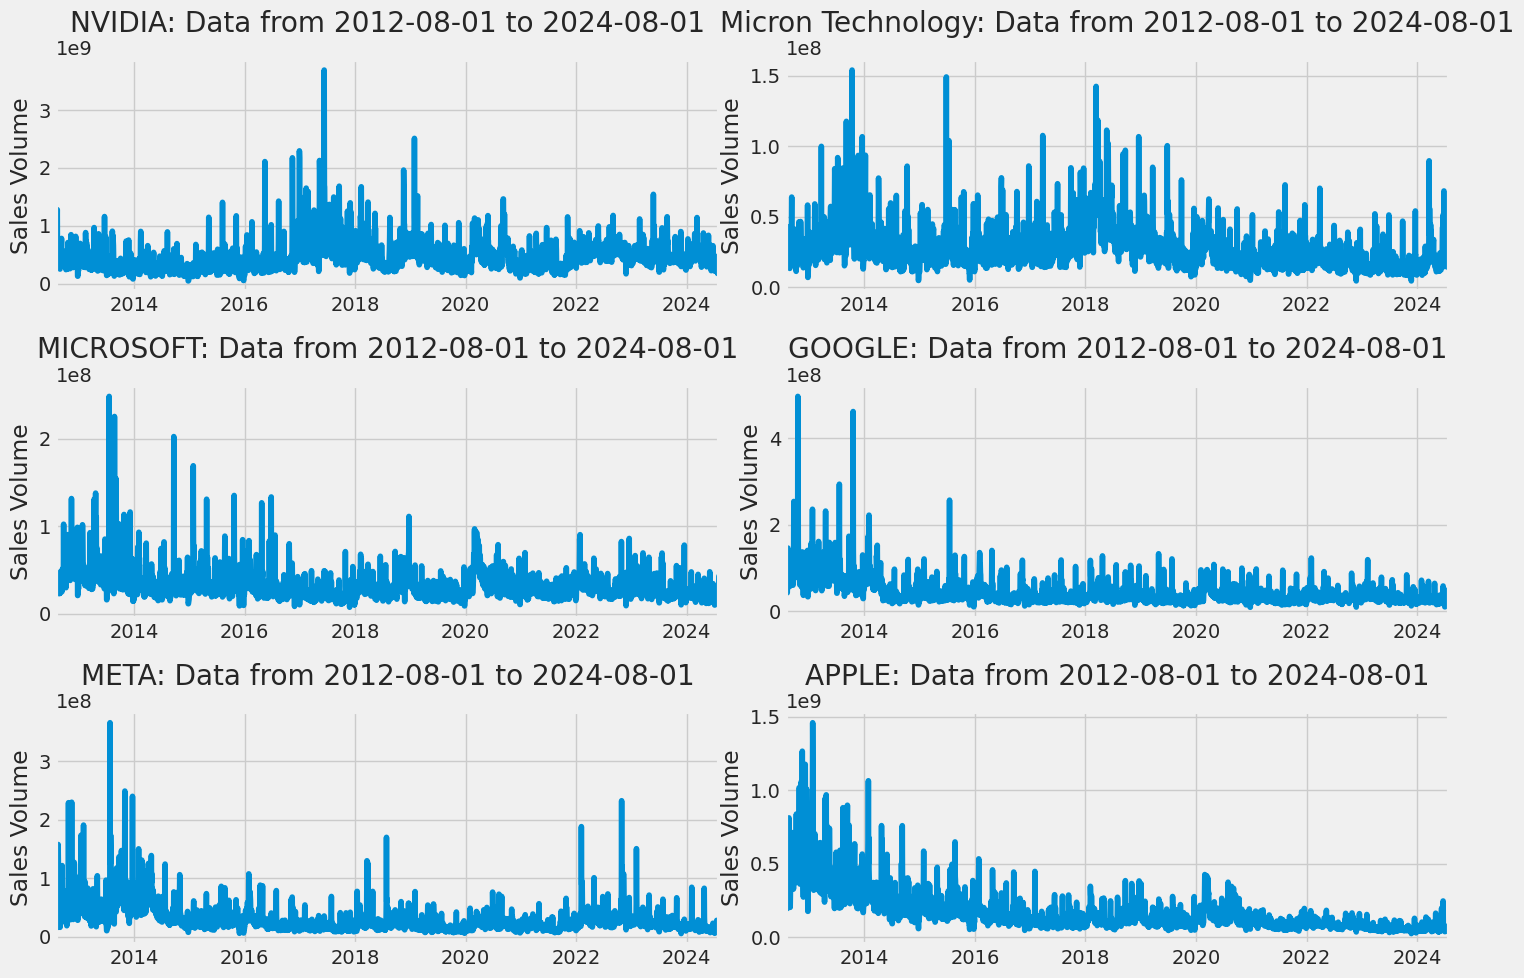

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Sales Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}: {date_range}")

plt.tight_layout()
plt.show()

### Dataset which is only for closing price of all stocks

In [ ]:
closing_df = yf.download(stock_tickers, start=start_date, end=end_date)['Close']
#Forward fill for non-trading days
closing_df.fillna(method='ffill', inplace=True)
#Backward fill if forward fill leaves NaNs at the beginning
closing_df.fillna(method='bfill', inplace=True)
closeprix_df = closing_df.pct_change()  #Calculate the percentage change in the dataset of closing price
closeprix_df.head()

[*********************100%%**********************]  6 of 6 completed
<ipython-input-214-13a67fcdb8d6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_df.fillna(method='ffill', inplace=True)
<ipython-input-214-13a67fcdb8d6>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  closing_df.fillna(method='bfill', inplace=True)


Ticker,AAPL,GOOGL,META,MSFT,MU,NVDA
Date,,,,,,
2012-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-02,0.001615,-0.006212,-0.040230,-0.007480,-0.017544,0.003734
2012-08-03,0.013014,0.020008,0.052395,0.019185,0.027597,0.020833
2012-08-06,0.011126,0.002323,0.039355,0.006723,0.037915,0.021137
2012-08-07,-0.002634,-0.003547,-0.054745,0.010351,0.038052,0.009993


### Risk Vs Expected Return

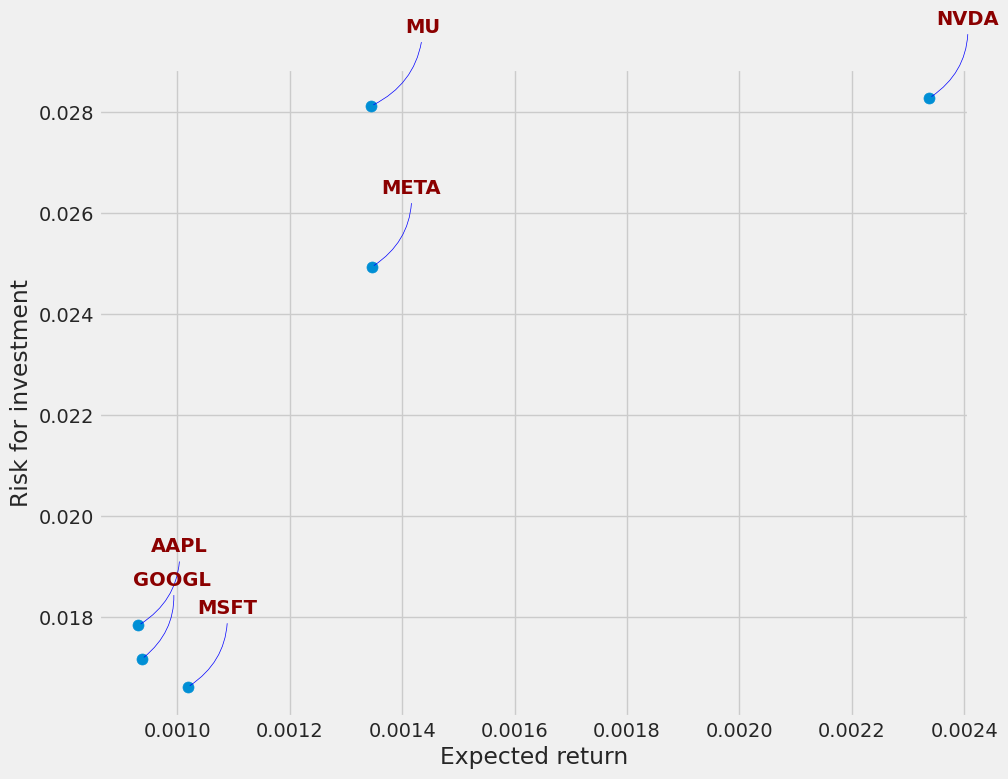

In [ ]:
cp_df = closeprix_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(cp_df.mean(), cp_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk for investment')

for label, x, y in zip(cp_df.columns, cp_df.mean(), cp_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', color='darkred',
        fontweight='bold', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### Correlation between NVIDIA and Micron Technology

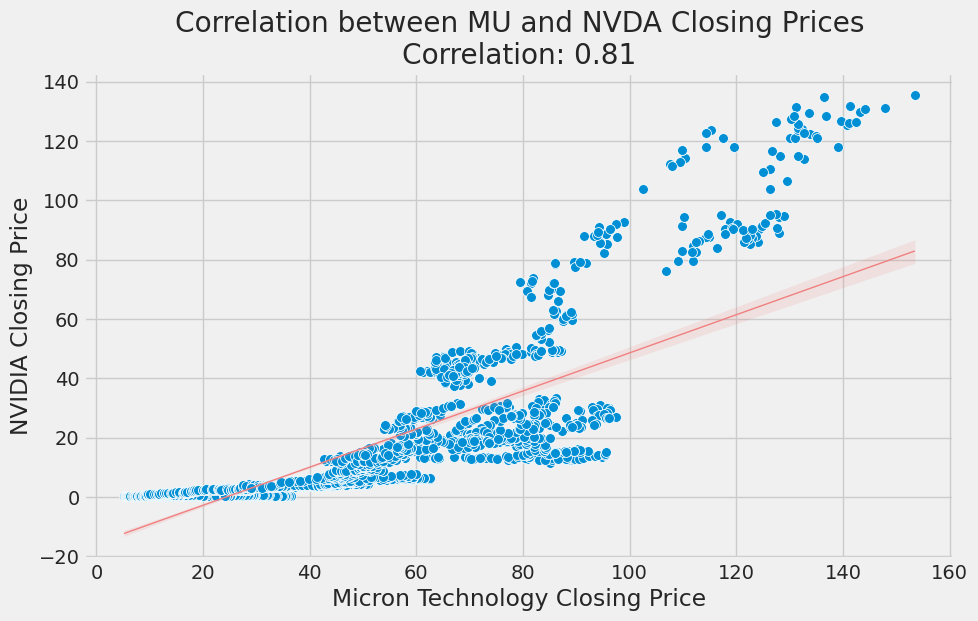

In [ ]:
mudf_close= mu_df['Close']
nvda_close= nvda_df['Close']
combined_df = pd.DataFrame({
    'MU': mudf_close,
    'NVDA': nvda_close
})

combined_df.dropna(inplace=True)
correlation = combined_df.corr().loc['MU', 'NVDA']
#print(f"The correlation between MU and NVDA closing prices is: {correlation:.2f}")

#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['MU'], y=combined_df['NVDA'], s=50)
sns.regplot(x='MU', y='NVDA', data=combined_df, scatter=False, color='lightcoral', line_kws={'linewidth': 1})
plt.title(f"Correlation between MU and NVDA Closing Prices\nCorrelation: {correlation:.2f}")
plt.xlabel('Micron Technology Closing Price')
plt.ylabel('NVIDIA Closing Price')
plt.grid(True)

plt.show()

### Correlation between NVIDIA, Micron Technology, Microsoft, GOOGLE, META, APPLE

Text(0.5, 1.0, 'Correlation of Tech Stocks Closing Price')

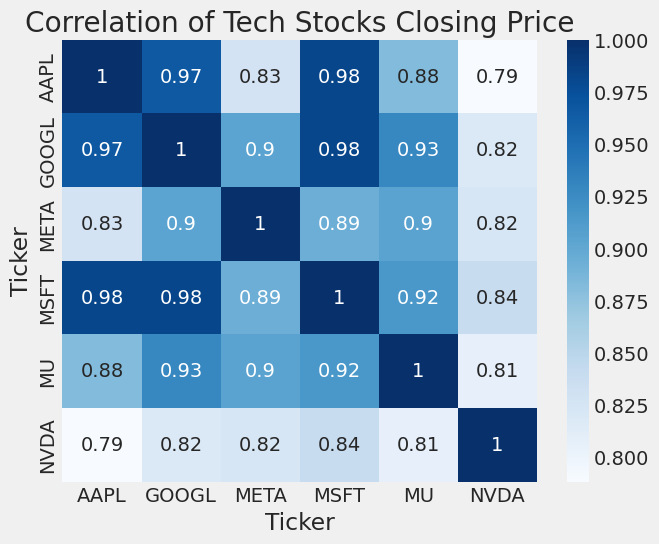

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of Tech Stocks Closing Price')

# Prediction of Closing Price

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
batchsize = 10

In [ ]:
no_epochs = 150

### NVIDIA

In [ ]:
#nvdadf = yf.download('NVDA', start='2012-01-01', end='2024-08-01') #setting cut-off date as 1 Aug

nvdadf = nvda_df

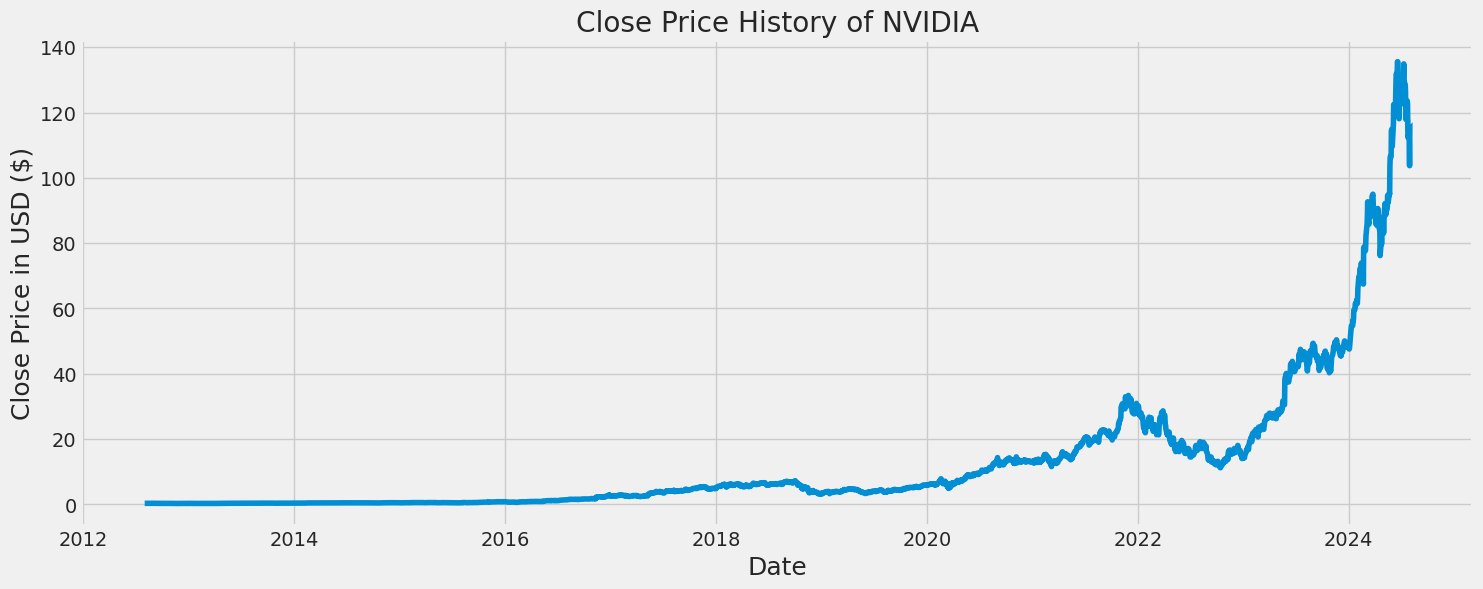

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History of NVIDIA')
plt.plot(nvdadf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [ ]:
len(nvdadf)

3132

In [ ]:
close_prices = nvdadf['Close'].values.reshape(-1, 1)

In [ ]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close_prices = scaler.fit_transform(close_prices)

In [ ]:
#To create a dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_data, y_data = create_dataset(scaled_close_prices, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features]
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)

In [ ]:
train_size = int(len(x_data) * 0.8)
test_size = len(x_data) - train_size
x_train, x_test = x_data[0:train_size], x_data[train_size:len(x_data)]
y_train, y_test = y_data[0:train_size], y_data[train_size:len(y_data)]

#### LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(25, activation='relu'))
model_lstm.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
#Define early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [ ]:
history = model_lstm.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
#history = model_lstm.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=0.2)

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 7.9549e-05 - val_loss: 1.5317e-04 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.9827e-06 - val_loss: 1.7151e-04 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 7.6314e-06 - val_loss: 3.5439e-04 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 6.6315e-06 - val_loss: 1.1969e-04 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.9463e-06 - val_loss: 1.7693e-04 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 8.1822e-06 - val_loss: 1.1991e-04 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 5.9252e-06 - val_loss: 1.7358e-04 - learning_rate: 5.0000e-04
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 4.9468e-06 - val_loss: 1.6068e-04 - learning_rate: 5.0000e-04
Epoch 9/150
194/194 ━━━━━━━━━━━━

In [ ]:
#Make predictions
y_train_pred = model_lstm.predict(x_train)
y_test_pred = model_lstm.predict(x_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
#Inverse transform predictions and actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

Test MAE: 9.045228229126781


In [ ]:
#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 15.657228034670949


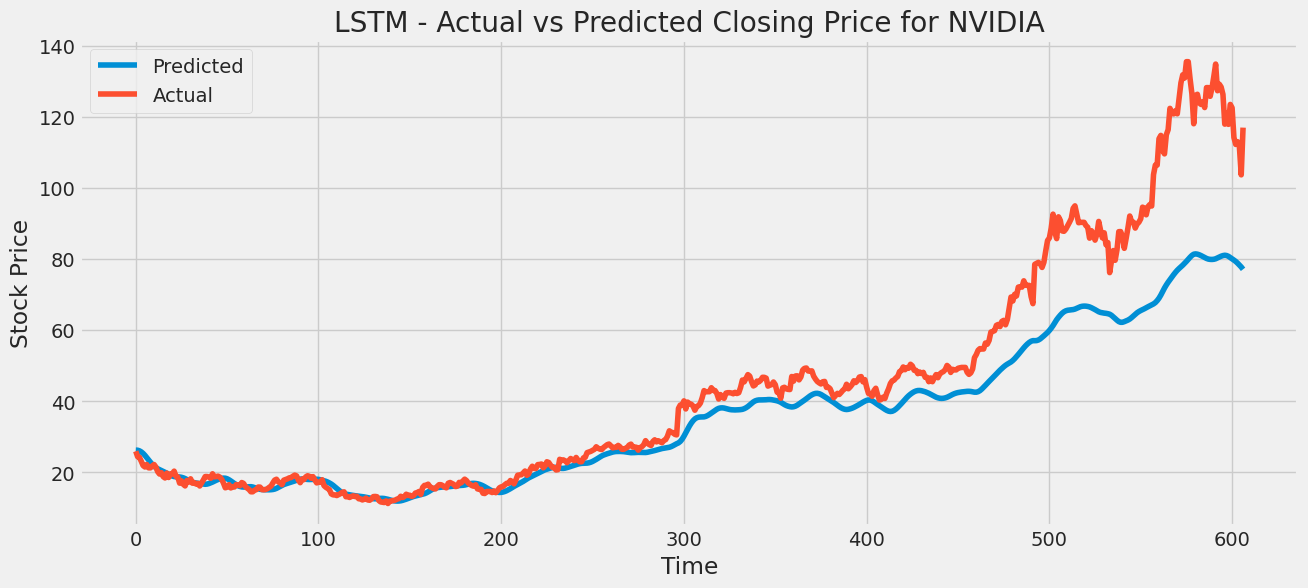

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('LSTM - Actual vs Predicted Closing Price for NVIDIA')
plt.grid(True)
plt.show()

#### CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Reshape x_train to match the input shape
x_train_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D())
model_cnn.add(Conv1D(32, 1, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(25, activation='relu'))
model_cnn.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 49, 32)              │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 25)                  │          39,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,587 (162.45 KB)

 Trainable params: 41,587 (162.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model_cnn.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr])
#history = model_cnn.fit(x_train_reshaped, y_train, batch_size=10, epochs=200, validation_split=0.2, callbacks=[early_stopping, reduce_lr,model_checkpoint])

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.6577e-05 - val_loss: 3.6873e-04 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7182e-06 - val_loss: 1.9075e-04 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8913e-06 - val_loss: 1.5828e-04 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3398e-06 - val_loss: 1.1662e-04 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8372e-06 - val_loss: 1.0083e-04 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7635e-06 - val_loss: 1.8795e-04 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4740e-06 - val_loss: 9.9704e-05 - learning_rate: 0.0010
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0471e-06 - val_loss: 1.4686e-04 - learning_rate: 5.0000e-04
Epoch 9/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
y_train_pred = model_cnn.predict(x_train)
y_test_pred = model_cnn.predict(x_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

Test MAE: 1.9048740537791118


In [ ]:
#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.9551062709414673


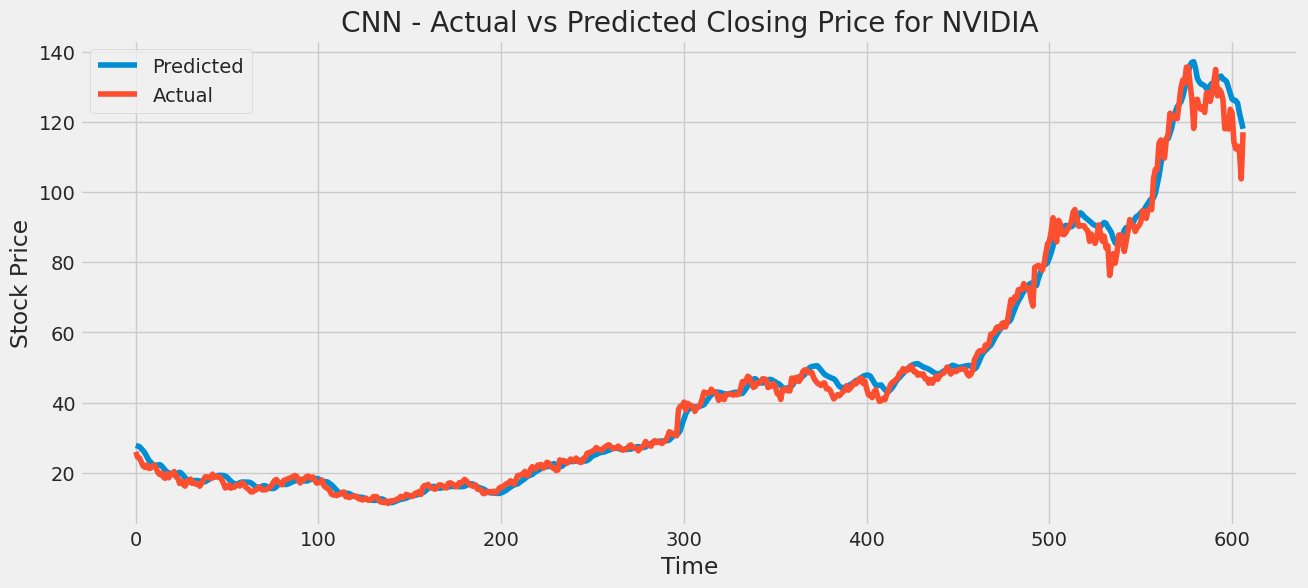

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('CNN - Actual vs Predicted Closing Price for NVIDIA')
plt.grid(True)
plt.show()

#### RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='linear'))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)             │ (None, 100, 128)            │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_rnn.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0062 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 6.9785e-05 - val_loss: 4.5509e-04 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 3.2489e-05 - val_loss: 4.1011e-04 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.9046e-05 - val_loss: 1.9783e-04 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.4460e-05 - val_loss: 1.0271e-04 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2623e-05 - val_loss: 1.4154e-04 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.3965e-05 - val_loss: 9.2552e-05 - learning_rate: 0.0010
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 8.7724e-06 - val_loss: 9.1924e-05 - learning_rate: 0.0010
Epoch 9/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 9s 20m

In [ ]:
y_train_pred = model_rnn.predict(x_train)
y_test_pred = model_rnn.predict(x_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

Test MAE: 1.6248084811441585


In [ ]:
#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 2.7617330915600413


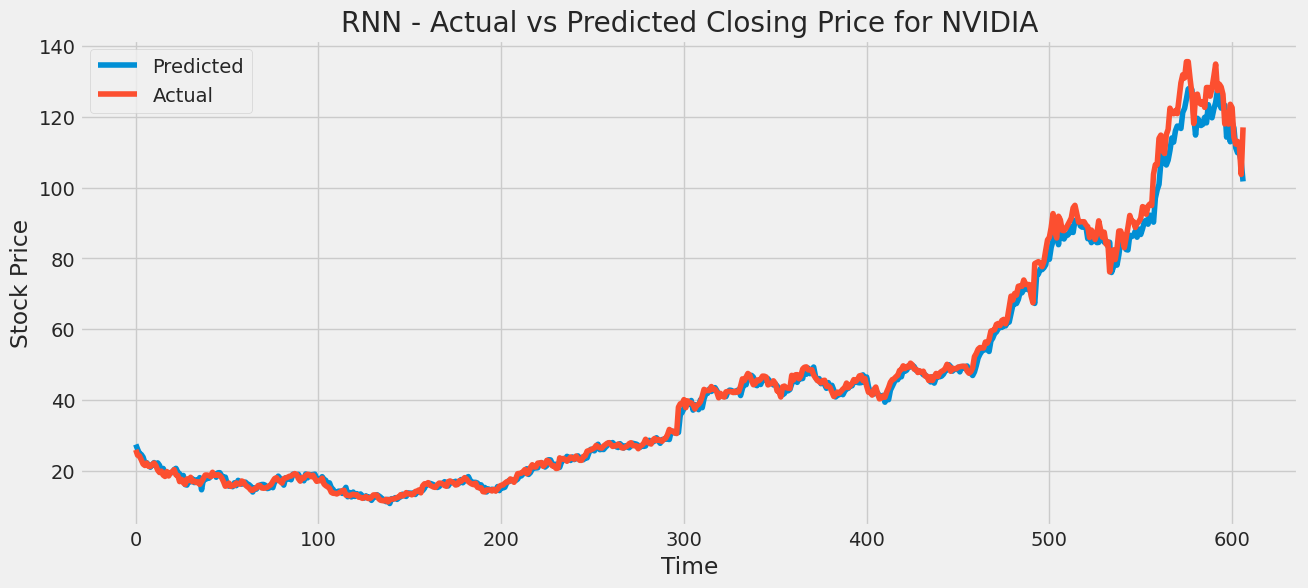

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('RNN - Actual vs Predicted Closing Price for NVIDIA')
plt.grid(True)
plt.show()

### Micron Technology

In [ ]:
#mudf = yf.download('MU', start='2012-01-01',end='2024-08-01')
mudf= mu_df
mudf.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
2012-08-01,6.31,6.42,6.17,6.27,6.152562,23396400.0,Micron Technology
2012-08-02,6.19,6.30,6.07,6.16,6.044622,17632000.0,Micron Technology
2012-08-03,6.32,6.45,6.24,6.33,6.211439,22472200.0,Micron Technology
2012-08-06,6.39,6.64,6.32,6.57,6.446944,26896900.0,Micron Technology
2012-08-07,6.70,6.98,6.67,6.82,6.692260,43058500.0,Micron Technology


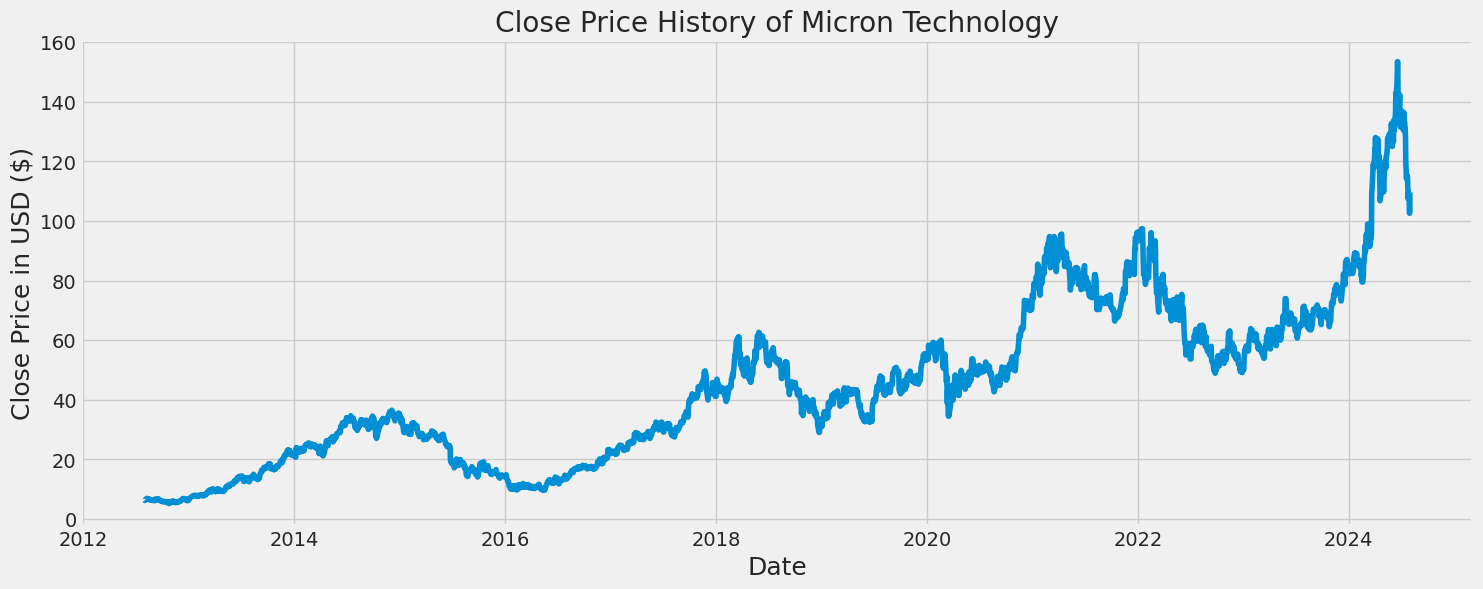

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History of Micron Technology')
plt.plot(mudf['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [ ]:
len(mudf)

3132

In [ ]:
close_prices_mu = mudf['Close'].values.reshape(-1, 1)

In [ ]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close_prices_mu = scaler.fit_transform(close_prices_mu)

In [ ]:
#To create a dataset for MU
time_step = 100
x_data, y_data = create_dataset(scaled_close_prices_mu, time_step)

In [ ]:
#Reshape input to be [samples, time steps, features]
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)

In [ ]:
train_size = int(len(x_data) * 0.8)
test_size = len(x_data) - train_size
x_train, x_test = x_data[0:train_size], x_data[train_size:len(x_data)]
y_train, y_test = y_data[0:train_size], y_data[train_size:len(y_data)]

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, return_sequences=False))
model_lstm.add(Dense(25, activation='relu'))
model_lstm.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
#Define early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [ ]:
#Train the model
history = model_lstm.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr]) #10,200
#history = model_lstm.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=0.2)

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0051 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4.1032e-04 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.4525e-04 - val_loss: 0.0015 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.3328e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.6185e-04 - val_loss: 6.3499e-04 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.3361e-04 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.4759e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.9896e-04 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 9/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.0001e-04

In [ ]:
#Make predictions
y_train_pred = model_lstm.predict(x_train)
y_test_pred = model_lstm.predict(x_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
#Inverse transform predictions and actual values
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

Test MAE: 3.7482119753490366


In [ ]:
#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')

Test RMSE: 5.809495003249696


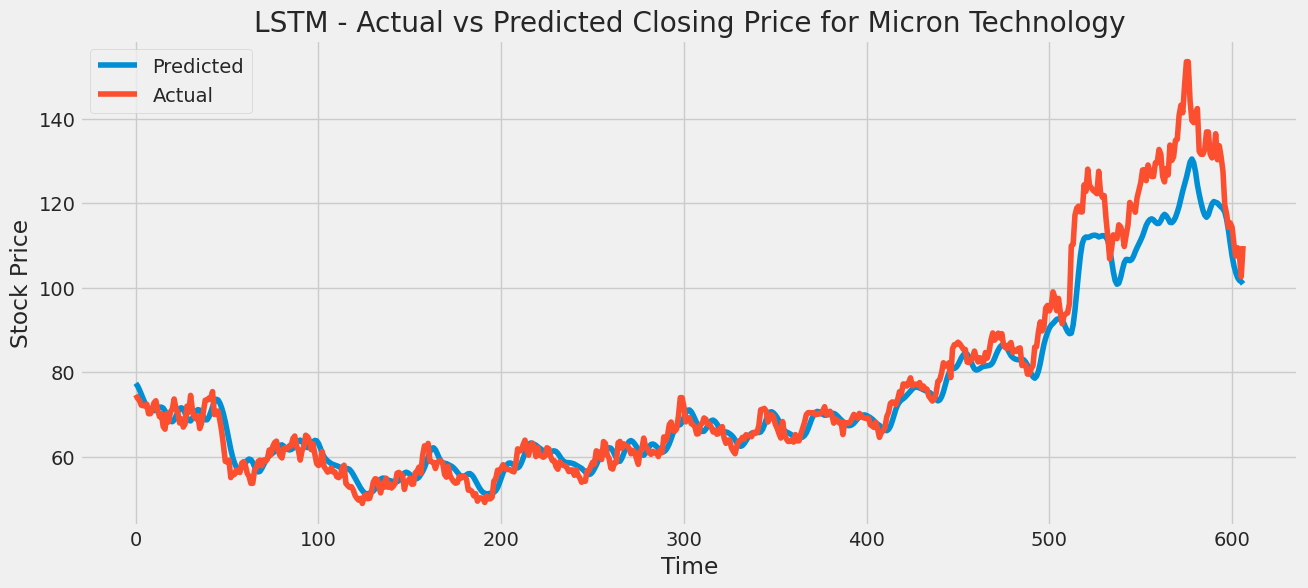

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('LSTM - Actual vs Predicted Closing Price for Micron Technology')
plt.grid(True)
plt.show()

#### CNN

In [ ]:
#Build the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(64, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model_cnn.add(MaxPooling1D())
model_cnn.add(Conv1D(32, 1, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(25, activation='relu'))
model_cnn.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model_cnn.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0034 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7280e-04 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6649e-04 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9606e-04 - val_loss: 5.9383e-04 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9670e-04 - val_loss: 7.0915e-04 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7341e-04 - val_loss: 4.7137e-04 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2834e-04 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8788e-04 - val_loss: 3.9791e-04 - learning_rate: 0.0010
Epoch 9/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3061e

In [ ]:
y_train_pred = model_cnn.predict(x_train)
y_test_pred = model_cnn.predict(x_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test MAE: 1.9097402280402145
Test RMSE: 2.6019464584432095


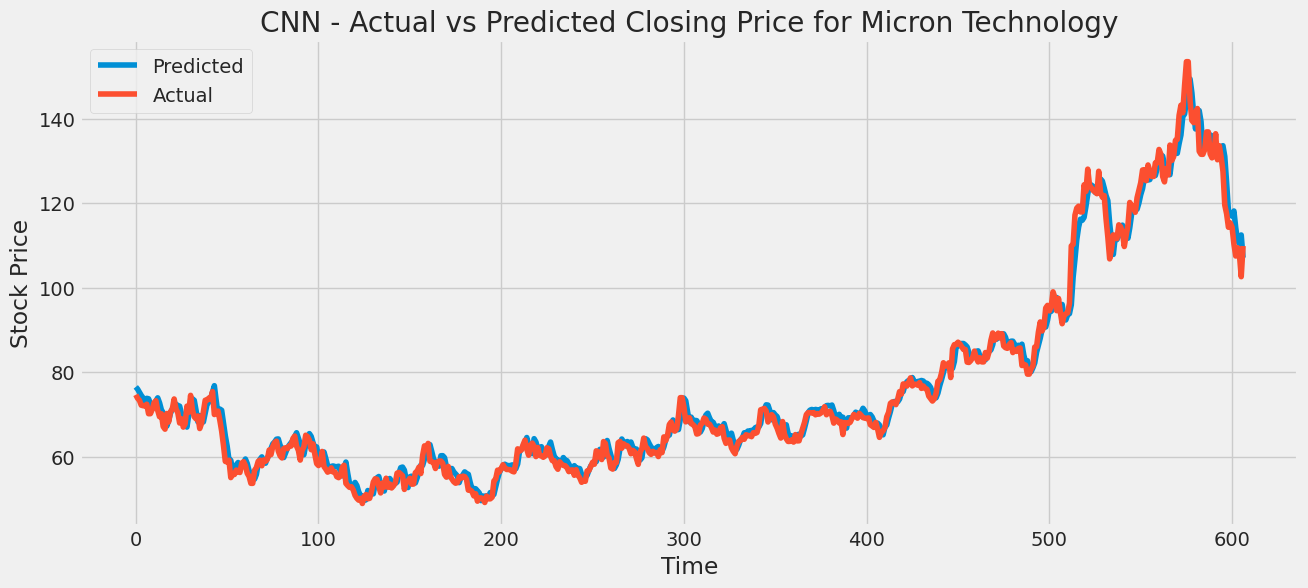

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('CNN - Actual vs Predicted Closing Price for Micron Technology')
plt.grid(True)
plt.show()

#### RNN

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='linear'))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)            │ (None, 100, 128)            │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
history = model_rnn.fit(x_train, y_train, batch_size=batchsize, epochs=no_epochs, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.2784 - val_loss: 0.0209 - learning_rate: 0.0010
Epoch 2/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.1235 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 3/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1035 - val_loss: 0.2602 - learning_rate: 0.0010
Epoch 4/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0308 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 5/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0064 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 6/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0023 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 7/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0018 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 8/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0014 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 9/150
194/194 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0014 - val_loss: 0.0023 - learning_rate:

In [ ]:
y_train_pred = model_rnn.predict(x_train)
y_test_pred = model_rnn.predict(x_test)

y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#Calculate MAE
test_mae = np.mean(np.abs(y_test_pred - y_test_actual))
print(f"Test MAE: {test_mae}")

#Calculate RMSE
test_rmse = np.sqrt(np.mean((y_test_pred - y_test_actual)**2))
print(f'Test RMSE: {test_rmse}')

76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test MAE: 19.706948376173244
Test RMSE: 24.463476221464475


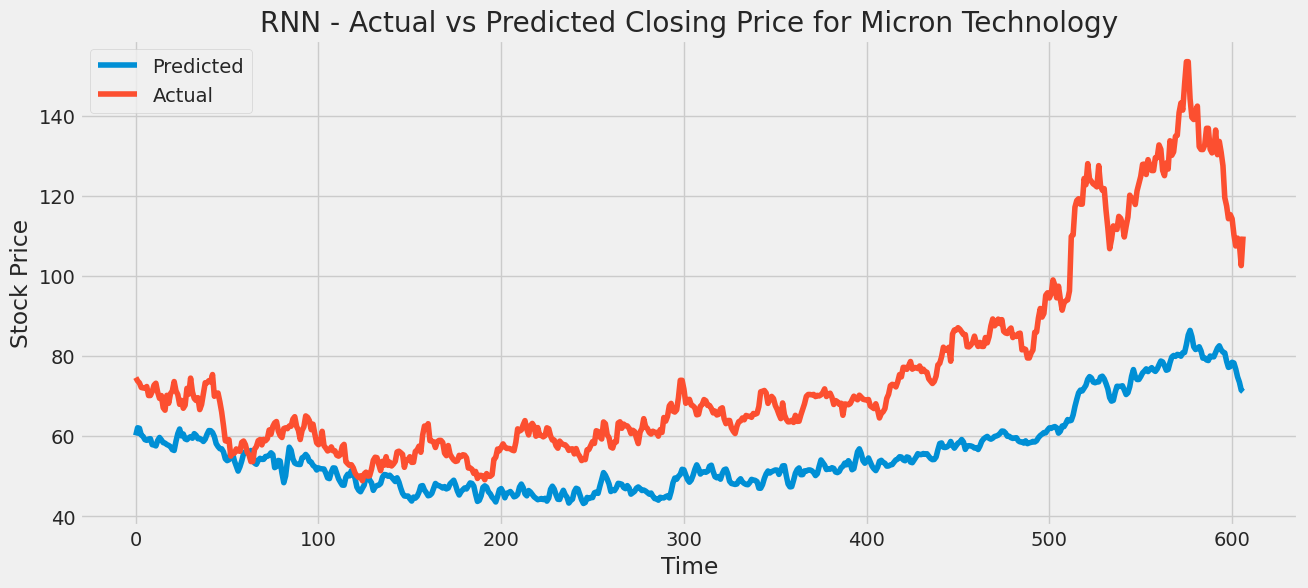

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test_actual, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('RNN - Actual vs Predicted Closing Price for Micron Technology')
plt.grid(True)
plt.show()